In [22]:
import pandas as pd

#Loading Train dataset
train_df = pd.read_csv("kdd_train.csv")

#deleting the "land" column
train_df.drop(['land'], axis = 1, inplace = True)

#Loading Test dataset
test_df = pd.read_csv("kdd_test.csv")

#deleting the "land" column
test_df.drop(['land'], axis = 1, inplace = True)

print("Training Data")
print(f"Shape: {train_df.shape}")
print(train_df.head())

print("\n--- Testing Data ---")
print(f"Shape: {test_df.shape}")
print(test_df.head())


Training Data
Shape: (125973, 41)
   duration protocol_type   service flag  src_bytes  dst_bytes  \
0         0           tcp  ftp_data   SF        491          0   
1         0           udp     other   SF        146          0   
2         0           tcp   private   S0          0          0   
3         0           tcp      http   SF        232       8153   
4         0           tcp      http   SF        199        420   

   wrong_fragment  urgent  hot  num_failed_logins  ...  dst_host_srv_count  \
0               0       0    0                  0  ...                  25   
1               0       0    0                  0  ...                   1   
2               0       0    0                  0  ...                  26   
3               0       0    0                  0  ...                 255   
4               0       0    0                  0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.

In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   wrong_fragment               125973 non-null  int64  
 7   urgent                       125973 non-null  int64  
 8   hot                          125973 non-null  int64  
 9   num_failed_logins            125973 non-null  int64  
 10  logged_in                    125973 non-null  int64  
 11  num_compromised              125973 non-null  int64  
 12  root_shell                   125973 non-null  int64  
 13 

In [24]:
train_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_c

In [25]:
train_df['count']

0           2
1          13
2         123
3           5
4          30
         ... 
125968    184
125969      2
125970      1
125971    144
125972      1
Name: count, Length: 125973, dtype: int64

In [26]:
train_df['protocol_type'].value_counts()

protocol_type
tcp     102689
udp      14993
icmp      8291
Name: count, dtype: int64

In [27]:
train_df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
       'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
       'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'labels'],
      dtype='object')

In [28]:
# Creating a binary classification for column 'labels' for training dataset
train_df['attack'] = train_df['labels'].apply(lambda x: 0 if x == 'normal' else 1)

In [29]:
# Creating a binary classification for column 'labels' for testing dataset
test_df['attack'] = test_df['labels'].apply(lambda x: 0 if x == 'normal' else 1)

C:\Users\Dev Bhatt\AppData\Local\Temp\ipykernel_15324\3901105459.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='attack', data=train_df, palette='Set1')


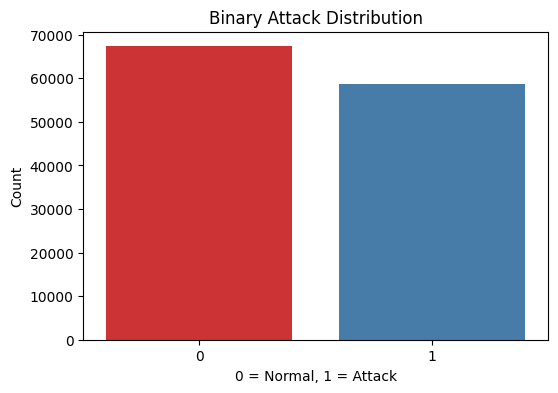

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='attack', data=train_df, palette='Set1')
plt.title('Binary Attack Distribution')
plt.xlabel('0 = Normal, 1 = Attack')
plt.ylabel('Count')
plt.show()